Faixa de horário para dormir:
                  Frequência Absoluta  Frequência Relativa (%)  \
faixa_horario                                                   
Antes das 22h                      1                     4.35   
Depois da 00h                     14                    60.87   
Entre 22h e 23h                    1                     4.35   
Entre 23h e 00h                    7                    30.43   

                 Frequência Acumulada  Frequência Acumulada (%)  
faixa_horario                                                    
Antes das 22h                       1                      4.35  
Depois da 00h                      15                     65.22  
Entre 22h e 23h                    16                     69.57  
Entre 23h e 00h                    23                    100.00   

Uso de dispositivos antes de dormir:
                   Frequência Absoluta  Frequência Relativa (%)  \
usa_dispositivos                                                 
Sim       

<ipython-input-1-c40c2f50e7ef>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="qualidade_sono", palette="Blues", order=sorted(df["qualidade_sono"].unique()))


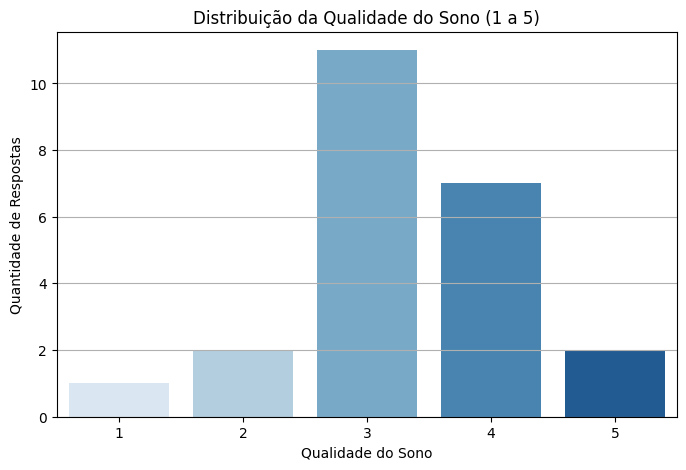

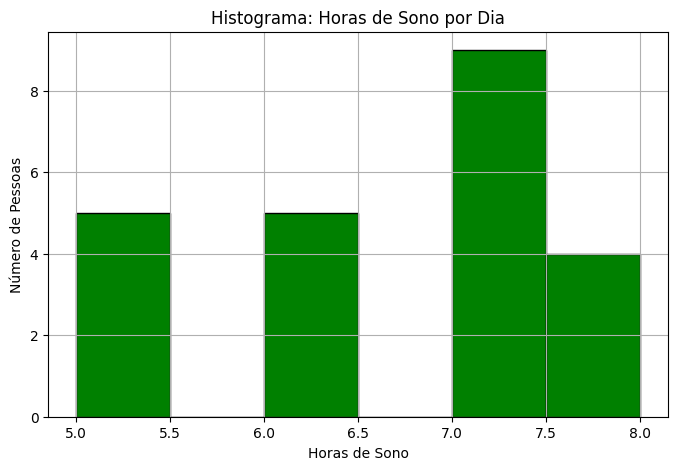

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_excel("P1 Ciência de Dados - Clayton (dados coletados).xlsx", sheet_name="Respostas ao formulário 1")

# Renomear colunas para facilitar o uso
df.columns = [
    "timestamp", "horas_sono", "faixa_horario", "usa_dispositivos",
    "qualidade_sono", "energia_ao_acordar", "acorda_vezes",
    "horas_produtivas", "sono_suficiente", "nome"
]

# ------------------------------------------------------
# 1. TABELAS DE FREQUÊNCIA - absoluta, relativa, acumulada
# ------------------------------------------------------

def gerar_tabela_frequencia(coluna):
    freq_abs = df[coluna].value_counts().sort_index()
    freq_rel = (freq_abs / freq_abs.sum()).round(4)
    freq_acum = freq_abs.cumsum()
    freq_acum_rel = freq_rel.cumsum().round(4)

    tabela = pd.DataFrame({
        "Frequência Absoluta": freq_abs,
        "Frequência Relativa (%)": (freq_rel * 100).round(2),
        "Frequência Acumulada": freq_acum,
        "Frequência Acumulada (%)": (freq_acum_rel * 100).round(2)
    })
    return tabela

# Gerar e exibir as tabelas de frequência
tabela_faixa = gerar_tabela_frequencia("faixa_horario")
tabela_dispositivos = gerar_tabela_frequencia("usa_dispositivos")
tabela_sono_suficiente = gerar_tabela_frequencia("sono_suficiente")

print("Faixa de horário para dormir:\n", tabela_faixa, "\n")
print("Uso de dispositivos antes de dormir:\n", tabela_dispositivos, "\n")
print("Acredita dormir o suficiente:\n", tabela_sono_suficiente, "\n")

# ------------------------------------------------------
# 2. MÉDIA, MEDIANA, MODA para variáveis quantitativas
# ------------------------------------------------------

def estatisticas_basicas(coluna):
    media = df[coluna].mean()
    mediana = df[coluna].median()
    moda = df[coluna].mode()[0]
    desvio = df[coluna].std()

    print(f"--- {coluna.upper()} ---")
    print(f"Média: {media:.2f}")
    print(f"Mediana: {mediana}")
    print(f"Moda: {moda}")
    print(f"Desvio padrão: {desvio:.2f}\n")

estatisticas_basicas("horas_sono")
estatisticas_basicas("horas_produtivas")

# ------------------------------------------------------
# 3. GRÁFICOS
# ------------------------------------------------------

# Gráfico de barras - Qualidade do sono
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="qualidade_sono", palette="Blues", order=sorted(df["qualidade_sono"].unique()))
plt.title("Distribuição da Qualidade do Sono (1 a 5)")
plt.xlabel("Qualidade do Sono")
plt.ylabel("Quantidade de Respostas")
plt.grid(True, axis='y')
plt.show()

# Histograma - Horas de sono
plt.figure(figsize=(8,5))
plt.hist(df["horas_sono"], bins=6, color='green', edgecolor='black')
plt.title("Histograma: Horas de Sono por Dia")
plt.xlabel("Horas de Sono")
plt.ylabel("Número de Pessoas")
plt.grid(True)
plt.show()
